In [1550]:
# Importamos las librerías necesarias para el análisis:
import pandas as pd
import numpy as np
import plotly as pt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pandas.plotting import scatter_matrix
import os

import sklearn
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Demencia es un término general para un deterioro grave de la capacidad mental que interfiere con la vida cotidiana. La demencia no es una sola enfermeda, si no una colección de síntomas que uno puede experimentar si está viviendo con una variedad de enfermedades, incluyendo la enfermedad de Alzheimer. Las enfermedades agrupadas bajo el término general "demencia" son causadas por cambios cerebrales anormales. Los síntomas de demencia causan un deterioro en las habilidades del pensamiento, también conocidas como habilidades cognitivas, tan graves que interfieren con la vida diaria y la función independiente. El Alzheimer es el tipo más común de demencia.

La demencia es una enfermedad infradiagnosticada, una problemática que deriva en que, en muchas ocasiones, el diagnóstico llegue cuando la persona muestra síntomas evidentes de la enfermedad. Alcanzar este diagnóstico en una etapa inicial facilita que se puedan tomar medidas que mejoren el futuro de la persona con demencia.

SOURCE: Alzheimer’s Association

PROPÓSITO DEL ANÁLISIS:                                                                                                                                                                                    
Predecir si un paciente tiene la enfermedad de Alzheimer o riesgo de padecerla en base a una serie de parámetros.

DATASET USADO:                                                                                                                                                                                          

oasis_longitudinal.csv: Estos datos constan de más de 300 muestras correspondientes a exploraciones por resonancia magnética de 150 personas de entre 60 y 98 años. "Longitudinal" se refiere al hecho de que los datos se recopilaron en múltiples momentos en el tiempo para cada individuo.

SOURCE: Open Access Series of Imaging Studies (OASIS)

In [1497]:
# Directorio de ubicación del dataset:

import os
base_dir = 'C:/Users/campo/OneDrive/Desktop/data/contenidos/modulo 2/modulo tres/proyecto final Alzheimer/'
df = pd.read_csv('C:/Users/campo/OneDrive/Desktop/data/contenidos/modulo 2/modulo tres/proyecto final Alzheimer/oasis_longitudinal.csv', delimiter=';')

In [1498]:
# Vista general de las columnas:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

SIGNIFICADO DE LAS COLUMNAS COMO VARIABLES USADAS PARA REALIZAR EL ESTUDIO:

ID: Indentificación del paciente.                                                                                                                                                                            
HAND: Contiene la dominancia manual del sujeto evaluado.

DATOS DEMOGRÁFICOS:

M/F: Género                                                                                                                                                                                                
AGE: Edad del paciente.                                                                                                                                                                                  
EDUC: Almacena el grado de instrucción. Clasificado entre las categorías: 1: secundaria incompleta, 2: secundaria completa, 3: universidad incompleta, 4: universidad completa ,5: post-bachiller.                                                                                                                                                                                  
SES: Estado socioeconómico evaluado por el índice de Posición Social de Hollingshead y clasificado en categorías del 1 (estado más alto) al 5 (estado más bajo).

INFORMACIÓN CLÍNICA:

MMSE: puntaje en el test MMSE(Mini-Mental State Examination) que mide la función cognitiva. Rangos de 0 (Peor) a 30 (Mejor), puntajes menores a 24 sugiere función anormal.                                
CDR: puntaje en el test CDR(Clinical Dementia Rating) que evalúa el grado de deterioro cognitivo. 0 : Sin demencia, 0.5 : Demencia muy leve, 1 : Demencia leve y 2 : Demencia moderada.

VOLUMENES ANATÓMICOS DERIVADOS:

eTIV: Volumen intracraneal total estimado en mm3.                                                                                                                                                          
nWBV: Volumen total del cerebro normalizado expresado como porcentaje de todos los vóxeles en la imagen enmascarada del atlas que están etiquetados como materia gris o blanca mediante el proceso automatizado de segmentación de tejido.                                                                                                                                                                    
ASF: Factor de escala Atlas Factor computarizado que transforma el cerebro y el cráneo del espacio nativo al objetivo del atlas (es decir, el determinante de la matriz de transformación).                
DELAY: Cantidad de días entre las sesiones de MRI.


Mini–Mental State Examination (MMSE)
 Prueba de Folstein es un cuestionario de 30 puntos que se utiliza ampliamente en entornos clínicos y de investigación para medir el deterioro cognitivo. Se utiliza comúnmente en medicina y afines a la salud para detectar demencia. También se utiliza para estimar la gravedad y la progresión del deterioro cognitivo y para seguir el curso de los cambios cognitivos en un individuo a lo largo del tiempo; lo que lo convierte en una forma eficaz de documentar la respuesta de un individuo al tratamiento. 

Interpretaciones
Cualquier puntuación mayor o igual a 24 puntos (sobre 30) indica una cognición normal. Por debajo de esto, las puntuaciones pueden indicar un deterioro cognitivo grave (≤9 puntos), moderado (10 a 18 puntos) o leve (19 a 23 puntos). Es posible que también sea necesario corregir la puntuación bruta según el nivel educativo y la edad. Es decir, una puntuación máxima de 30 puntos nunca puede descartar la demencia. Las puntuaciones bajas a muy bajas se correlacionan estrechamente con la presencia de demencia, aunque otros trastornos mentales también pueden provocar resultados anormales en las pruebas MMSE.

Clinical Dementia Rating (CDR)
La CDR™ en un aspecto es una escala de 5 puntos utilizada para caracterizar seis dominios de desempeño cognitivo y funcional aplicables a la enfermedad de Alzheimer y demencias relacionadas: memoria, orientación, juicio y resolución de problemas, asuntos comunitarios, hogar y pasatiempos y cuidado personal. La información necesaria para realizar cada calificación se obtiene a través de una entrevista semiestructurada del paciente y un informante confiable o fuente colateral (por ejemplo, un miembro de la familia) denominado Protocolo de Evaluación CDR™.
La tabla de puntuación CDR™ proporciona anclajes descriptivos que guían al médico a realizar calificaciones adecuadas basadas en los datos de la entrevista y el juicio clínico. Además de las calificaciones para cada dominio, se puede calcular una puntuación CDR™ general mediante el uso de un algoritmo de puntuación CDR™. Esta puntuación es útil para caracterizar y rastrear el nivel de deterioro/demencia de un paciente:
• 0 = Normal
• 0,5 = Demencia muy leve
• 1 = Demencia leve
• 2 = Demencia moderada
• 3 = Demencia severa

Estimated total intracranial volume (eTIV)
La medida ICV, a veces denominada volumen intracraneal total (TIV), se refiere al volumen estimado de la cavidad craneal según lo delineado por la duramadre supratentorial o el contorno cerebral cuando la duramadre no es claramente detectable. La ICV se utiliza a menudo en estudios relacionados con el análisis de la estructura cerebral bajo diferentes modalidades de imagen, como resonancia magnética (RM), resonancia magnética y tensor de difusión (DTI), resonancia magnética y tomografía computarizada por emisión de fotón único (SPECT), ultrasonido y tomografía computarizada por emisión de fotón único. Tomografía (TC). La consistencia de ICV durante el envejecimiento lo convierte en una herramienta confiable para corregir la variación del tamaño de la cabeza entre sujetos en estudios que se basan en características morfológicas del cerebro. El ICV, junto con la edad y el género, se informan como covariables para ajustarlos a los análisis de regresión en la investigación de trastornos cerebrales neurodegenerativos progresivos, como la enfermedad de Alzheimer, el envejecimiento y el deterioro cognitivo. 

In [1499]:
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0,1987,696,883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0,2004,681,876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,5,1678,736,1046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,5,1738,713,1010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,5,1698,701,1034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,5,1693,694,1037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,5,1688,675,1040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0,1319,801,1331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0,1327,796,1323


In [1500]:
# Ver rangos de datos por método describe() para obtener un resumen estadístico de las columnas numéricas, que incluye el mínimo, el máximo y los cuartiles.
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,1.774799,1488.128686,729.568365,1195.461126
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,2.291337,176.139286,37.135016,138.091958
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,644.000000,876.000000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,700.000000,1099.000000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,729.000000,1194.000000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,5.000000,1597.000000,756.000000,1293.000000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,5.000000,2004.000000,837.000000,1587.000000


In [1501]:
# Usar el método isnull() junto con sum() para ver datos faltantes en cada columna.
datos_faltantes = df.isnull().sum()
print(datos_faltantes)

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [1502]:
# Rellenar los valores faltantes de las columnas SES y MMSE con la media, ya que son columnas numéricas.
df['SES'] = df['SES'].fillna(df['SES'].mean())
df['MMSE'] = df['MMSE'].fillna(df['MMSE'].mean())

In [1503]:
# Cambiamos el nombre de la columna 'M/F' a 'Gender' para que sea más entendible.
df = df.rename(columns={'M/F': 'Gender'})

In [1504]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.0,0,1987,696,883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.0,0,2004,681,876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,5,1678,736,1046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.0,5,1738,713,1010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.0,5,1698,701,1034


In [1505]:
# Eliminar columnas no necesarias para el estudio.
df = df.drop(['Subject ID', 'MRI ID', 'Visit', 'MR Delay', 'Hand', 'ASF'], axis=1)

In [1506]:
# Convertir los valores numéricos en la columna 'EDUC' a categorías de texto que representan diferentes niveles de educación
def transform_educ(value):
    if 6 <= value <= 9:
        return 'secundaria incompleta'
    elif 9 < value <= 12:
        return 'secundaria completa'
    elif 12 < value <= 16:
        return 'universidad incompleta'
    elif 16 < value <= 19:
        return 'universidad completa'
    elif 19 < value <= 23:
        return 'post-bachiller'
    else:
        return value

df['EDUC'] = df['EDUC'].apply(transform_educ)

In [1507]:
# Crear un diccionario que mapee las columnas a categorias del 1 al 5, según nivel educativo.
educ_mapping = {
    'secundaria incompleta': 1,
    'secundaria completa': 2,
    'universidad incompleta': 3,
    'universidad completa': 4,
    'post-bachiller': 5
}

# Reemplazar los nombres de las filas usando el diccionario
df['EDUC'] = df['EDUC'].replace(educ_mapping)

In [1508]:
df

,Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
0,Nondemented,M,87,3,2.000000,27.0,0,1987,696
1,Nondemented,M,88,3,2.000000,30.0,0,2004,681
2,Demented,M,75,2,2.460452,23.0,5,1678,736
3,Demented,M,76,2,2.460452,28.0,5,1738,713
4,Demented,M,80,2,2.460452,22.0,5,1698,701
...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,3,1.000000,28.0,5,1693,694
369,Demented,M,86,3,1.000000,26.0,5,1688,675
370,Nondemented,F,61,3,2.000000,30.0,0,1319,801
371,Nondemented,F,63,3,2.000000,30.0,0,1327,796


In [1494]:
# Poner datos en valor entero.
df['SES'] = df['SES'].astype(int)
df['CDR'] = df['MMSE'].astype(int)

In [1509]:
df

,Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
0,Nondemented,M,87,3,2.000000,27.0,0,1987,696
1,Nondemented,M,88,3,2.000000,30.0,0,2004,681
2,Demented,M,75,2,2.460452,23.0,5,1678,736
3,Demented,M,76,2,2.460452,28.0,5,1738,713
4,Demented,M,80,2,2.460452,22.0,5,1698,701
...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,3,1.000000,28.0,5,1693,694
369,Demented,M,86,3,1.000000,26.0,5,1688,675
370,Nondemented,F,61,3,2.000000,30.0,0,1319,801
371,Nondemented,F,63,3,2.000000,30.0,0,1327,796


In [1510]:
# Guardar copia del df original.
df_original = df.copy()

In [1511]:
# Para profundizar en un ánalisis más detallado sobre el estado de la enfermedad, hacemos una división de la columna 'Age' por las edades en pacientes menores de 65 (Alzheimer precoz) y mayores de 65 (Alzheimer avanzado).
def funcion1(fila):
    if fila['Age'] > 65:
        return 1
    else:
        return 0

df['Age'] = df.apply(funcion1, axis=1)

In [1512]:
# Crear un diccionario que mapee la columna ´Group´en los tres estados de la enfermedad.
group_mapping = {
    'Nondemented': 0,
    'Converted': 1,
    'Demented': 2,
}

# Reemplazar los nombres de las filas usando el diccionario
df['Group'] = df['Group'].replace(group_mapping)

In [1513]:
# Dividir los datos de la columna 'Gender' a binario.
gender_mapping = {
    'M': 0,
    'F': 1,
}

# Reemplazar los nombres de las filas usando el diccionario
df['Gender'] = df['Gender'].replace(gender_mapping)

In [1514]:
# Realizamos una función que nos devuelva dos valores para medir la función cognitiva de cada sujeto: Rangos de 0-24 (Peor) o más de 24 (Mejor), puntajes menores a 24 sugiere función anormal.
def funcion2(fila):
    if fila['MMSE'] > 24:
        return '1'
    else:
        return '0'


df['MMSE'] = df.apply(funcion2, axis=1)

In [1515]:
# Reordenar las columnas para colocar la columna 'Group' de la primera a la última posición.
columns = ['Gender', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'Group']

df = df.reindex(columns=columns)

In [1519]:
# Poner datos en valor entero.
df['SES'] = df['SES'].astype(int)

In [1520]:
# Guardar el DataFrame modificado en un nuevo archivo.
df.to_csv('clean_data.csv', index=False)

In [1535]:
df_clean = pd.read_csv('C:/Users/campo/OneDrive/Desktop/data/contenidos/modulo 2/modulo tres/proyecto final Alzheimer/clean_data.csv')

df_clean = pd.DataFrame(df_clean)

In [1522]:
df_clean

,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,Group
0,0,1,3,2,1,0,1987,696,0
1,0,1,3,2,1,0,2004,681,0
2,0,1,2,2,0,5,1678,736,2
3,0,1,2,2,1,5,1738,713,2
4,0,1,2,2,0,5,1698,701,2
...,...,...,...,...,...,...,...,...,...
368,0,1,3,1,1,5,1693,694,2
369,0,1,3,1,1,5,1688,675,2
370,1,0,3,2,1,0,1319,801,0
371,1,0,3,2,1,0,1327,796,0


ANALISIS EXPLORATORIO (EDA):

In [1412]:
# Assuming df_clean is your DataFrame and 'Age', 'Gender' and 'Group' are columns in df_clean
df_grouped = df_clean.groupby(['Age', 'Gender', 'Group']).size().reset_index(name='Count')

# Add custom labels to 'Group' column
df_grouped['Group'] = df_grouped['Group'].map({0: 'Nondemented: 0', 1: 'Converted: 1', 2: 'Demented: 2'})
df_grouped['Gender'] = df_grouped['Gender'].map({0: 'Male: 0', 1: 'Female: 1'})

# Create the interactive pie chart
fig = px.pie(df_grouped, values='Count', names='Group', facet_col='Gender', title='Evaluación final de la enfermedad en pacientes por género')

# Show the plot
fig.show()

Se registra un ligero aumento de demencia en hombres frente a mujeres, sin embargo, las personas que en un principio no registraron la enfermedad pero el diagnostico final fue que poseen la enfermedad, es mayor en mujeres.

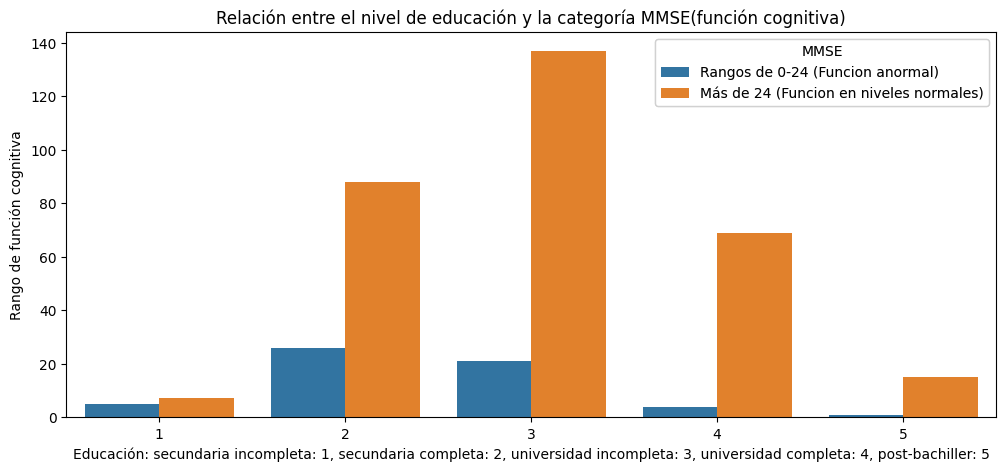

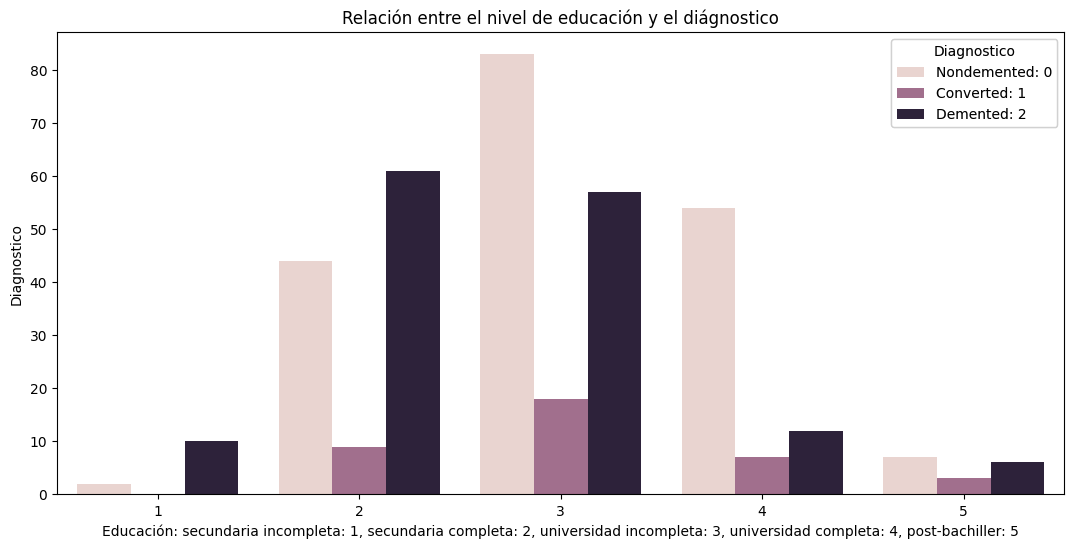

In [1438]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 5))
sns.countplot(x='EDUC', hue='MMSE', data=df_clean)
plt.title('Relación entre el nivel de educación y la categoría MMSE(función cognitiva)')

# Create MMSE legend
mmse_legend = plt.legend(['Rangos de 0-24 (Funcion anormal)', 'Más de 24 (Funcion en niveles normales)'], title='MMSE', loc='upper right')

# Add MMSE legend manually to the current Axes.
plt.gca().add_artist(mmse_legend)

plt.xlabel('Educación: secundaria incompleta: 1, secundaria completa: 2, universidad incompleta: 3, universidad completa: 4, post-bachiller: 5')
plt.ylabel('Rango de función cognitiva')
plt.show()

# Segundo grafico:
plt.figure(figsize=(13, 6))
sns.countplot(x='EDUC', hue='Group', data=df_clean)
plt.title('Relación entre el nivel de educación y el diágnostico')

# Create Group legend
legend1 = plt.legend(['Nondemented: 0', 'Converted: 1', 'Demented: 2'], title='Diagnostico', loc='upper right')

# Add Group legend manually to the current Axes.
plt.gca().add_artist(legend1)

plt.xlabel('Educación: secundaria incompleta: 1, secundaria completa: 2, universidad incompleta: 3, universidad completa: 4, post-bachiller: 5')
plt.ylabel('Diagnostico')
plt.show()



Si la MMSE(Mini-Mental State Examination) que mide la función cognitiva tiene un puntuaje menor a 24 sugiere función anormal, pero salvo los pacientes del grupo 1 que no terminaron los estudios, el resto de sujetos presenta un nivel cognitivo con buenos resultados.                                                                                                                                         
 El nivel educativo si influye muy directamente, por lo que tener un nivel educativo más avanzado (universitario o superior) podría ser un indicativo de no sufrir la enfermedad en un futuro.

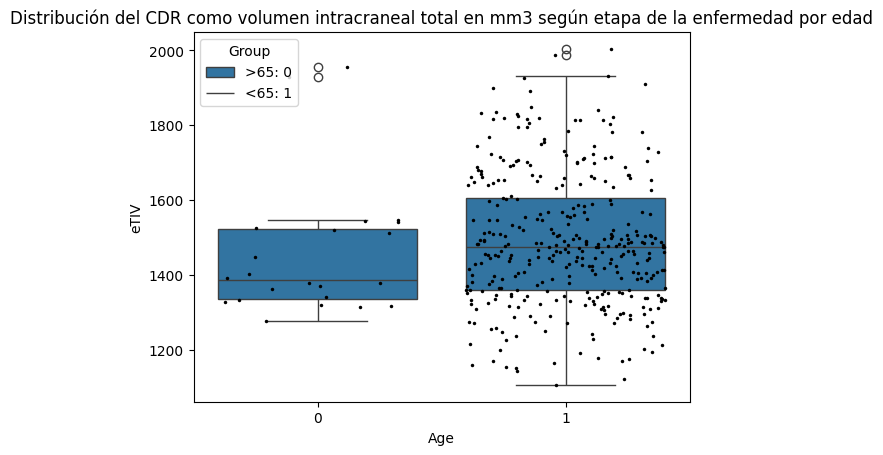

In [1366]:
#Distribución del eTIV como total en mm3 de volumen intracraneal según etapa de la enfermedad por edad (gráfico boxplot y stripplot con la librería seaborn).
# Create boxplot and stripplot
sns.boxplot(x='Age', y='eTIV', data=df_clean)
sns.stripplot(x='Age', y='eTIV', data=df_clean, color="black", jitter=0.4, size=2.5)
plt.legend(['>65: 0', '<65: 1'], title='Group', loc='upper left')
plt.title('Distribución del CDR como volumen intracraneal total en mm3 según etapa de la enfermedad por edad')
plt.show()

Se observa que a medida que se avanza en los grupos de edad, la mediana del volumen intracraneal total (eTIV) aumenta con un cambio más notorio a partir de los 65 años.

In [1525]:

df_sorted = df.sort_values('CDR')

fig = px.line(df_sorted, x='CDR', y='nWBV', title='Relación entre CDR y nWBV')

# Show the plot
fig.show()

In [1526]:
correlation_coefficient = df['CDR'].corr(df['nWBV'])
print(correlation_coefficient)

-0.20605467997810278


In [1367]:

fig = px.box(df_original, x='Age', y='nWBV', points="all")

# Update layout
fig.update_layout(title_text='Distribución del nWBV según grupo de edad')

# Show the plot
fig.show()

Y con respecto al volumen total del cerebro normalizado (nWBV), este va disminuyendo con cambio notorio a partir de los 70 años.

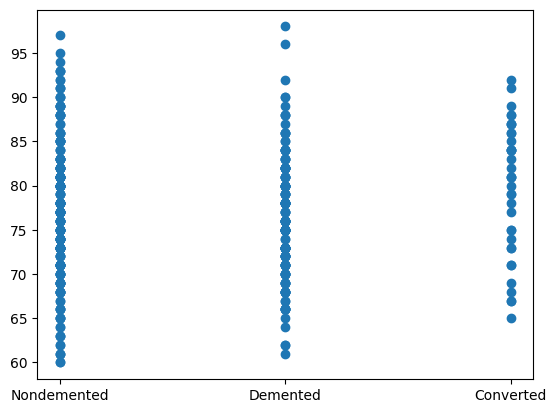

In [1387]:
plt.scatter(df['Group'], df['Age'])
plt.show()

Este diagrama de dispersión puede ayudar a visualizar la relación entre las columnas "Grupo" y "Edad", dónde podemos predecir la tendencia de edades más altas o más bajas. Las personas no diagnosticadas se agrupan entre los 60 a 95, mostrando una concentración entre 65 a 90 con pacientes con demencia, siendo de los 75 a 90 cuándo los sujetos primero mostraton un falso diagnostico que acabo siendo positivo.

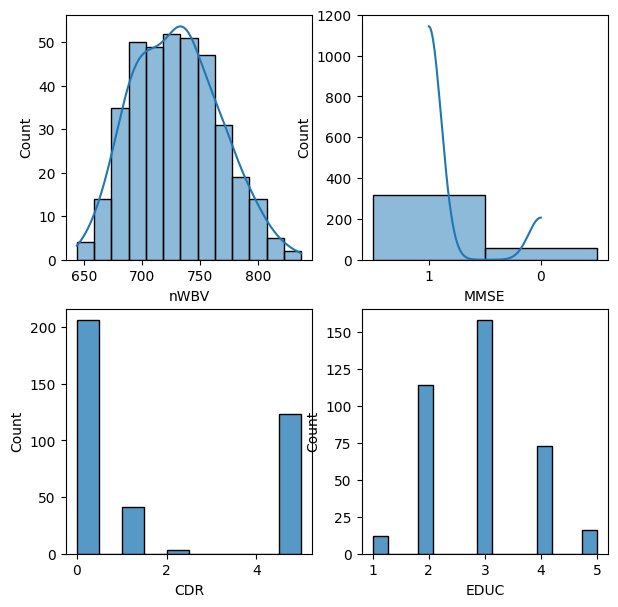

In [1523]:
# Grafico histplot para hacer una comparativa de diferentes parametros:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.histplot(data=df, x="nWBV", kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="MMSE", kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="CDR", ax=axs[1, 0])
sns.histplot(data=df, x="EDUC", ax=axs[1, 1])
plt.show()

Se observa que el volumen total del cerebro normalizado nWBV sigue una distribución aparentemente normal con una mediana de 740; en el test MMSE hay una proporción alta de personas que un nivel cognictivo normal superior al puntuaje 24; respecto al CDR, de los que presentan algún grado de demencia, se observan mayor frecuencia en personas sin demencia (0); y en cuanto al grado de educación, con mayor frecuencia los sujetos presentaron la universidad incompleta (3).

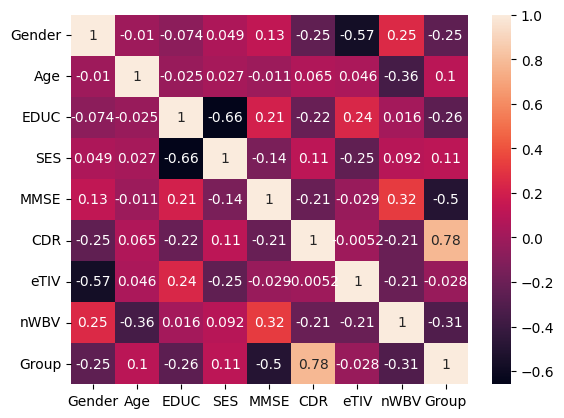

In [1541]:
corr = df_clean.corr()
sns.heatmap(corr, annot = True)
plt.show()


8, se tiene un mapa de color con los valores de los 373 sujetos en el dataset, y se puede observar que de las variables de interés aquellas que presentan una mayor correlación son: nWBV-Edad, nWBV-CDR, nWBV-MMSE, CDR-Edad y CDR-MMSE. 

Aplicar coeficientes:

In [1553]:
# Assuming 'feature1', 'feature2', and 'feature3' are your features and 'target' is your target variable
x = df_clean.iloc[:, :-1] # Seleccionamos todas las columnas excepto la última
y = df_clean.iloc[:, -1] # Elegimos sólo la última columna


In [1557]:

X = df_clean.iloc[:, :-1] # Seleccionamos todas las columnas excepto la última
y = df_clean.iloc[:, -1] # Elegimos sólo la última columna

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the probabilities of the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_scores)

print('AUC score:', auc_score)

C:\Users\campo\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



ValueError: multiclass format is not supported

No se puede aplicar la curva ROC ya que este dataset no soporta variables con varias clases.

Support Vector Machine Model

In [1559]:
from sklearn.model_selection import train_test_split
# Asumiendo que X es tu matriz de características e y es tu vector de etiquetas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [1561]:
# Modelo SVC 
from sklearn.svm import SVC
from sklearn.metrics import classification_report

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        34
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        34

    accuracy                           0.45        75
   macro avg       0.15      0.33      0.21        75
weighted avg       0.21      0.45      0.28        75



C:\Users\campo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\campo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\campo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



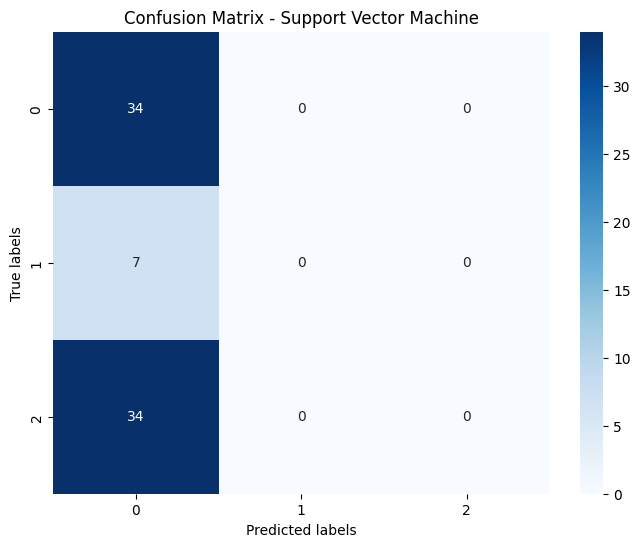

In [1564]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de confusión para SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()